# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('sinasc_RO_2019.csv')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
# Criar a coluna de faixas de Latitude
sinasc['lat_faixa'] = pd.cut(sinasc['munResLat'],
                             bins=[-np.inf, -10.5, np.inf],
                             labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Agrupar e calcular estatísticas para PESO e APGAR5
# Adicionando 'observed=False' para manter o comportamento atual e silenciar o warning
estatisticas_por_lat = sinasc.groupby('lat_faixa', observed=False)[['PESO', 'APGAR5']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

print("Estatísticas para PESO e APGAR5 por Faixa de Latitude:")
print(estatisticas_por_lat)

Estatísticas para PESO e APGAR5 por Faixa de Latitude:
                     PESO                                              \
                      sum         mean  min   max  median         std   
lat_faixa                                                               
Abaixo de -10.5  42098594  3240.098053  258  5985  3270.0  531.815114   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                  APGAR5                              \
                           var       sum      mean  min   max median   
lat_faixa                                                              
Abaixo de -10.5  282827.315354  118393.0  9.138788  0.0  10.0    9.0   
Acima de -10.5   309678.570242  128746.0  9.216551  0.0  10.0    9.0   

                                     
                      std       var  
lat_faixa                            
Abaixo de -10.5  0.805381  0.648638  
Acima de -10.5   0.774741  0.600224  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [15]:
# Criar a coluna de faixas de Área
sinasc['area_faixa'] = pd.cut(sinasc['munResArea'],
                              bins=[-np.inf, 3000, np.inf],
                              labels=['Abaixo de 3000 km²', 'Acima de 3000 km²'])

# Agrupar e calcular estatísticas para PESO e APGAR5
# Adicionando 'observed=False' para manter o comportamento atual e silenciar o warning
estatisticas_por_area = sinasc.groupby('area_faixa', observed=False)[['PESO', 'APGAR5']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

print("\nEstatísticas para PESO e APGAR5 por Faixa de Área do Município:")
print(estatisticas_por_area)


Estatísticas para PESO e APGAR5 por Faixa de Área do Município:
                        PESO                                              \
                         sum         mean  min   max  median         std   
area_faixa                                                                 
Abaixo de 3000 km²  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000 km²   70857126  3249.134538  292  5985  3280.0  547.716582   

                                     APGAR5                              \
                              var       sum      mean  min   max median   
area_faixa                                                                
Abaixo de 3000 km²  282580.595074   47560.0  9.130351  0.0  10.0    9.0   
Acima de 3000 km²   299993.453720  199579.0  9.190836  0.0  10.0    9.0   

                                        
                         std       var  
area_faixa                              
Abaixo de 3000 km²  0.801124  0.641799  
Acima de 3000 

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
# Criar faixas de Altitude (exemplo: baixa, média, alta - ajuste os bins se quiser mais faixas)
# Usando quartis como exemplo para criar faixas mais equilibradas
# Limpando NaNs para calcular os quartis
alturas_validas = sinasc['munResAlt'].dropna()
q1 = alturas_validas.quantile(0.33)
q2 = alturas_validas.quantile(0.66)

sinasc['alt_faixa'] = pd.cut(sinasc['munResAlt'],
                             bins=[-np.inf, q1, q2, np.inf],
                             labels=['Baixa', 'Média', 'Alta'])

# Agrupar e calcular estatísticas para PESO e APGAR5
# Adicionando 'observed=False' para maintain current behavior and silence the warning
estatisticas_por_alt = sinasc.groupby('alt_faixa', observed=False)[['PESO', 'APGAR5']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

print("\nEstatísticas para PESO e APGAR5 por Faixa de Altitude do Município:")
print(estatisticas_por_alt)


Estatísticas para PESO e APGAR5 por Faixa de Altitude do Município:
               PESO                                              \
                sum         mean  min   max  median         std   
alt_faixa                                                         
Baixa      29506101  3246.710057  295  5135  3280.0  574.665098   
Média      31760539  3253.486888  292  5480  3275.0  522.680855   
Alta       26387102  3226.990583  258  5985  3260.0  536.077127   

                           APGAR5                                        \
                     var      sum      mean  min   max median       std   
alt_faixa                                                                 
Baixa      330239.975019  83198.0  9.213511  0.0  10.0    9.0  0.760670   
Média      273195.276388  89451.0  9.186710  0.0  10.0    9.0  0.795204   
Alta       287378.686433  74490.0  9.132034  0.0  10.0    9.0  0.814953   

                     
                var  
alt_faixa            
Baixa      

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


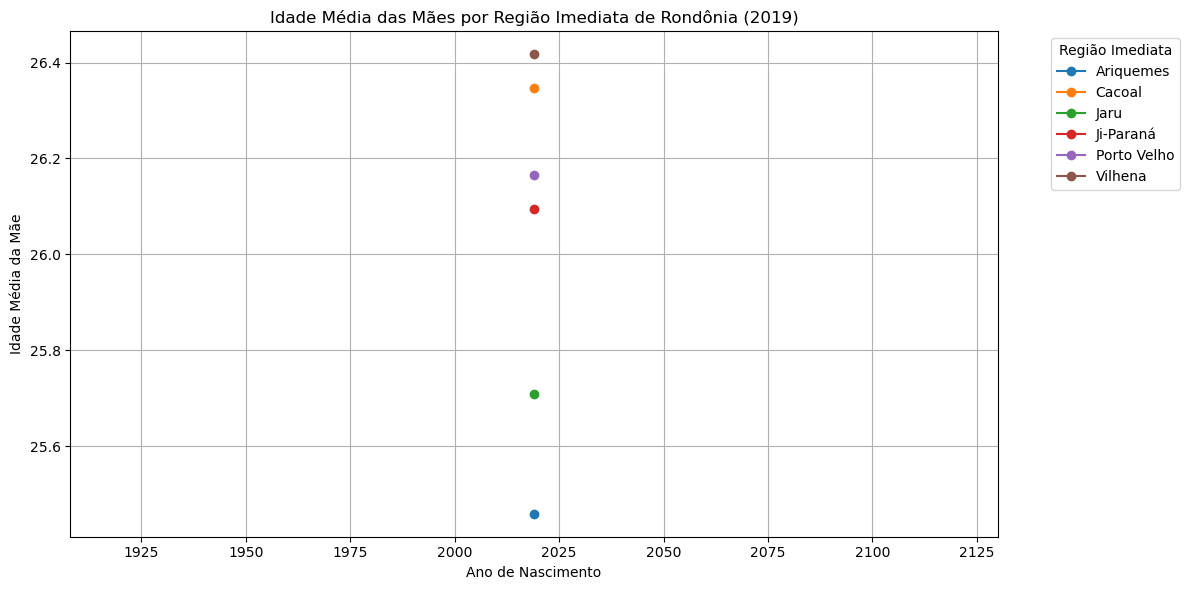


Idade Média das Mães por Região Imediata e Ano de Nascimento:
RegiaoImediata  Ariquemes     Cacoal       Jaru  Ji-Paraná  Porto Velho  \
ANO_NASCIMENTO                                                            
2019            25.459635  26.347817  25.708853   26.09472    26.166303   

RegiaoImediata    Vilhena  
ANO_NASCIMENTO             
2019            26.417143  


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'sinasc' já esteja carregado. Se não, rode:
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

# --- Mapeamento de municípios para regiões imediatas ---
mapeamento_regioes = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

# Criar a coluna 'RegiaoImediata' no DataFrame sinasc usando o mapeamento
# Se algum município em 'munResNome' não estiver no mapeamento, ele terá um valor NaN em 'RegiaoImediata'
sinasc['RegiaoImediata'] = sinasc['munResNome'].map(mapeamento_regioes)

# --- Fim do Mapeamento ---

# Certifique-se de que 'DTNASC' é do tipo datetime
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

# Extrair o ano de nascimento
sinasc['ANO_NASCIMENTO'] = sinasc['DTNASC'].dt.year

# Agrupar por ano e RegiaoImediata, calculando a idade média da mãe
# Usamos .dropna() para excluir regiões que não foram mapeadas
idade_media_por_regiao_tempo = sinasc.groupby(['ANO_NASCIMENTO', 'RegiaoImediata'], observed=False)['IDADEMAE'].mean().unstack()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
idade_media_por_regiao_tempo.plot(kind='line', marker='o', ax=plt.gca()) # ax=plt.gca() evita warnings se o plot for feito em Jupyter
plt.title('Idade Média das Mães por Região Imediata de Rondônia (2019)')
plt.ylabel('Idade Média da Mãe')
plt.xlabel('Ano de Nascimento')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover legenda para fora
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nIdade Média das Mães por Região Imediata e Ano de Nascimento:")
print(idade_media_por_regiao_tempo)

In [26]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

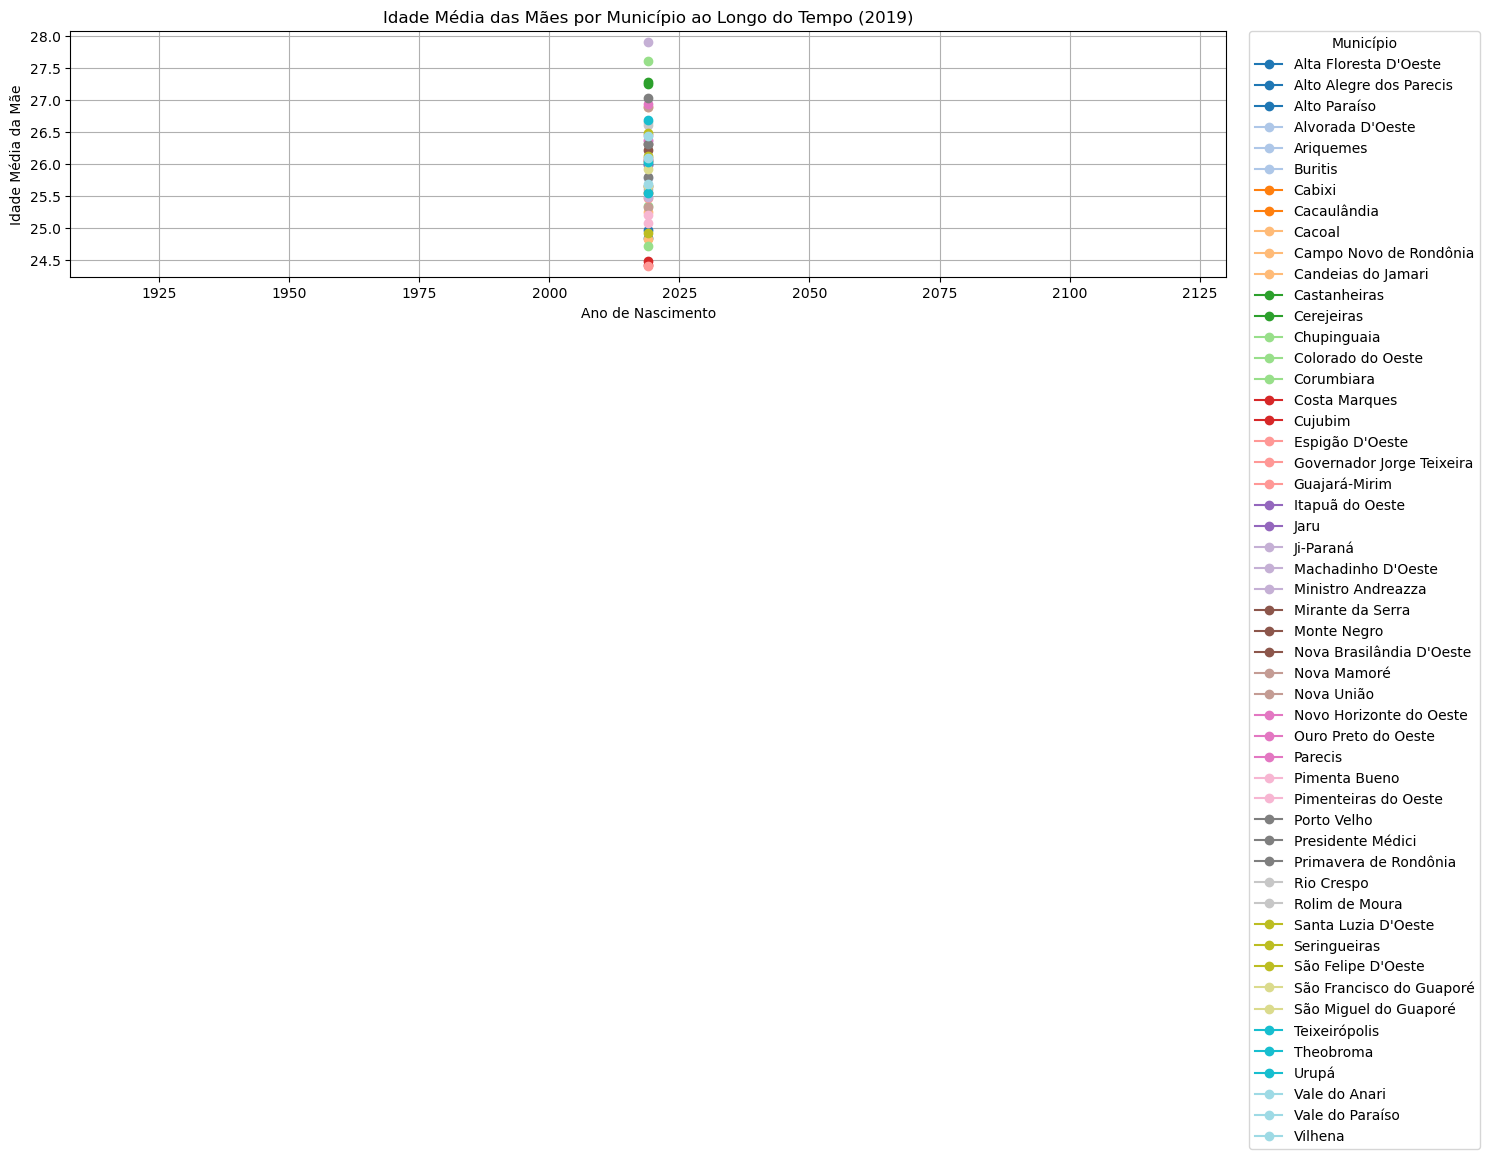


Idade Média das Mães por Município e Ano de Nascimento:
munResNome      Alta Floresta D'Oeste  Alto Alegre dos Parecis  Alto Paraíso  \
ANO_NASCIMENTO                                                                 
2019                        25.991826                24.844156     24.960177   

munResNome      Alvorada D'Oeste  Ariquemes    Buritis   Cabixi  Cacaulândia  \
ANO_NASCIMENTO                                                                 
2019                   25.770732  25.607866  25.559177  26.0375    25.546667   

munResNome         Cacoal  Campo Novo de Rondônia  ...  Seringueiras  \
ANO_NASCIMENTO                                     ...                 
2019            26.890102               24.825301  ...     24.910714   

munResNome      São Felipe D'Oeste  São Francisco do Guaporé  \
ANO_NASCIMENTO                                                 
2019                     26.481481                 25.660066   

munResNome      São Miguel do Guaporé  Teixeirópoli

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'sinasc' já esteja carregado. Se não, rode:
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

# --- Lista de todos os municípios que você quer no gráfico ---
municipios_desejados = [
    "Candeias do Jamari", "Guajará-Mirim", "Itapuã do Oeste", "Nova Mamoré", "Porto Velho",
    "Ariquemes", "Alto Paraíso", "Buritis", "Cacaulândia", "Campo Novo de Rondônia", "Cujubim",
    "Monte Negro", "Rio Crespo",
    "Jaru", "Governador Jorge Teixeira", "Machadinho D'Oeste", "Theobroma", "Vale do Anari",
    "Alvorada D'Oeste", "Costa Marques", "Ji-Paraná", "Mirante da Serra", "Nova União",
    "Ouro Preto do Oeste", "Presidente Médici", "São Francisco do Guaporé", "São Miguel do Guaporé",
    "Seringueiras", "Teixeirópolis", "Urupá", "Vale do Paraíso",
    "Cacoal", "Alta Floresta D'Oeste", "Alto Alegre dos Parecis", "Castanheiras", "Espigão D'Oeste",
    "Ministro Andreazza", "Nova Brasilândia D'Oeste", "Novo Horizonte do Oeste", "Parecis",
    "Pimenta Bueno", "Primavera de Rondônia", "Rolim de Moura", "Santa Luzia D'Oeste", "São Felipe D'Oeste",
    "Vilhena", "Cabixi", "Cerejeiras", "Chupinguaia", "Colorado do Oeste", "Corumbiara", "Pimenteiras do Oeste"
]

# Certifique-se de que 'DTNASC' é do tipo datetime
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

# Extrair o ano de nascimento
sinasc['ANO_NASCIMENTO'] = sinasc['DTNASC'].dt.year

# Filtrar o DataFrame para incluir apenas os municípios desejados
# e remover NaNs em 'IDADEMAE' que atrapalhariam a média
sinasc_filtrado = sinasc[sinasc['munResNome'].isin(municipios_desejados)].dropna(subset=['IDADEMAE'])

# Agrupar por ano e nome do município, calculando a idade média da mãe
# Usamos .unstack() para que cada município vire uma coluna para plotagem
idade_media_por_municipio_tempo = sinasc_filtrado.groupby(['ANO_NASCIMENTO', 'munResNome'])['IDADEMAE'].mean().unstack()

# Plotar o gráfico
plt.figure(figsize=(15, 8)) # Aumentei o tamanho para acomodar mais linhas
idade_media_por_municipio_tempo.plot(kind='line', marker='o', ax=plt.gca(), cmap='tab20') # 'tab20' para mais cores
plt.title('Idade Média das Mães por Município ao Longo do Tempo (2019)')
plt.ylabel('Idade Média da Mãe')
plt.xlabel('Ano de Nascimento')
# Ajustar a legenda para que seja mais legível, se houver muitas linhas
plt.legend(title='Município', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

print("\nIdade Média das Mães por Município e Ano de Nascimento:")
print(idade_media_por_municipio_tempo.head()) # Mostra as primeiras linhas, pois a tabela completa é grande

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [38]:
import pandas as pd
import numpy as np

# Suponha que 'sinasc' já esteja carregado
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

print("--- Análise por IDH ---")

url_idh = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
tabelas_idh = pd.read_html(url_idh, thousands='.', decimal=',')

# --- ADICIONE ESTAS LINHAS PARA DEPURAR ---
print("Total de tabelas encontradas:", len(tabelas_idh))
for i, df in enumerate(tabelas_idh):
    print(f"\nConteúdo da Tabela {i}:")
    print(df.head()) # Mostra as 5 primeiras linhas de cada tabela
    print(f"Colunas da Tabela {i}: {df.columns.tolist()}")

--- Análise por IDH ---
Total de tabelas encontradas: 4

Conteúdo da Tabela 0:
            Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   
2                 1       Porto Velho              0736              0764   
3                 2           Vilhena              0731              0734   
4                 3            Cacoal              0718              0727   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto  
2              0819              0638  
3              0808              0659  
4              0821     

In [46]:
import pandas as pd
import numpy as np

# Suponha que 'sinasc' já esteja carregado:
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

print("--- Análise por IDH (Correção Final) ---")

url_idh = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
tabelas_idh = pd.read_html(url_idh, thousands='.', decimal=',')
df_idh = tabelas_idh[0] # A tabela de IDH é a primeira (índice 0)

# Ajuste de nomes de colunas e limpeza
municipio_col = ('Município', 'Município', 'IDH-M muito alto')
idhm_col = ('Dados de 2010', 'IDH municipal', 'IDH-M muito alto')

df_idh = df_idh[[municipio_col, idhm_col]].copy() # Adicionado .copy() por boa prática
df_idh.columns = ['munResNome', 'IDH-M']

# Removendo as linhas de "nenhum município" e "IDH-M alto"
df_idh = df_idh[~df_idh['munResNome'].isin(['nenhum município', 'IDH-M alto'])].copy()

# PADRONIZAÇÃO dos nomes dos municípios em df_idh
df_idh['munResNome_limpo'] = df_idh['munResNome'].str.strip().str.upper()

# Limpeza e CONVERSÃO PARA NUMÉRICO, AGORA DIVIDINDO POR 1000
df_idh['IDH-M'] = df_idh['IDH-M'].astype(str).str.replace(',', '.', regex=False).str.strip()
df_idh['IDH-M'] = pd.to_numeric(df_idh['IDH-M'], errors='coerce')

# --- CORREÇÃO PRINCIPAL AQUI: DIVIDIR POR 1000 ---
df_idh['IDH-M'] = df_idh['IDH-M'] / 1000

# Remover linhas com IDH-M NaN no df_idh após a conversão e divisão
df_idh.dropna(subset=['IDH-M'], inplace=True)

# Padronizar nomes de municípios no sinasc para o merge
sinasc['munResNome_limpo'] = sinasc['munResNome'].str.strip().str.upper()

# Fazer o merge usando a coluna padronizada 'munResNome_limpo'
sinasc_com_idh = pd.merge(sinasc, df_idh[['munResNome_limpo', 'IDH-M']], on='munResNome_limpo', how='left')

# 3. Criar faixas de IDH
bins_idh = [0, 0.599, 0.699, 0.799, 1.0]
labels_idh = ['Baixo IDH', 'Médio IDH', 'Alto IDH', 'Muito Alto IDH']

sinasc_com_idh['faixa_IDH'] = pd.cut(sinasc_com_idh['IDH-M'], bins=bins_idh, labels=labels_idh, right=True)

# 4. Agrupar por faixa de IDH
estatisticas_por_idh = sinasc_com_idh.groupby('faixa_IDH', observed=False)[['CONSULTAS', 'QTDFILVIVO']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)
print("\nEstatísticas para CONSULTAS e QTDFILVIVO por Faixa de IDH:")
print(estatisticas_por_idh)

# Verificar a contagem de NaNs na coluna 'IDH-M' após o merge FINAL
print(f"\nContagem de NaNs na coluna 'IDH-M' no sinasc_com_idh (final): {sinasc_com_idh['IDH-M'].isna().sum()} de {len(sinasc_com_idh)}")

# Contagem de valores por faixa de IDH FINAL
print("\nContagem de valores por faixa de IDH FINAL:")
print(sinasc_com_idh['faixa_IDH'].value_counts(dropna=False))

--- Análise por IDH (Correção Final) ---

Estatísticas para CONSULTAS e QTDFILVIVO por Faixa de IDH:
               CONSULTAS                                                 \
                     sum      mean  min  max median       std       var   
faixa_IDH                                                                 
Baixo IDH           6649  3.641292  1.0  9.0    4.0  0.715406  0.511806   
Médio IDH          30576  3.663551  1.0  9.0    4.0  0.680575  0.463182   
Alto IDH           59437  3.526372  1.0  9.0    4.0  0.839712  0.705116   
Muito Alto IDH         0       NaN  NaN  NaN    NaN       NaN       NaN   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
faixa_IDH                                                                  
Baixo IDH          1860.0  1.072664  0.0  10.0    1.0  1.166182  1.359979  
Médio IDH          8738.0  1.088847  0.0  30.0    1.0  1.247413  1.55

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [52]:
import pandas as pd
import numpy as np

# Suponha que 'sinasc' já esteja carregado:
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

print("\n--- Análise por IFDM (Correção Final) ---")

# 1. Carregar a tabela do IFDM da Wikipédia
url_ifdm = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'
tabelas_ifdm = pd.read_html(url_ifdm, thousands='.', decimal=',')

# A tabela de IFDM é a primeira (índice 0) na página, conforme sua verificação.
df_ifdm = tabelas_ifdm[0]

# 2. Limpar e preparar o DataFrame do IFDM
# Selecionar as colunas específicas pelo seu nome completo de tupla, devido ao cabeçalho multinível.
municipio_col_ifdm = ('Município', 'Desenvolvimento alto')
ifdm_col = ('IFDM Consolidado (2013)', 'Desenvolvimento alto')

df_ifdm = df_ifdm[[municipio_col_ifdm, ifdm_col]].copy() # Usamos .copy() por boa prática
df_ifdm.columns = ['munResNome', 'IFDM'] # Renomear para padronizar com 'sinasc'

# Remover as linhas de "nenhum município" e "Desenvolvimento moderado" que são cabeçalhos internos
df_ifdm = df_ifdm[~df_ifdm['munResNome'].isin(['nenhum município', 'Desenvolvimento moderado'])].copy()

# Padronizar nomes de municípios em df_ifdm
df_ifdm['munResNome_limpo'] = df_ifdm['munResNome'].str.strip().str.upper()

# Limpeza e CONVERSÃO PARA NUMÉRICO, AGORA DIVIDINDO POR 10000
df_ifdm['IFDM'] = df_ifdm['IFDM'].astype(str).str.replace(',', '.', regex=False).str.strip()
df_ifdm['IFDM'] = pd.to_numeric(df_ifdm['IFDM'], errors='coerce')

# --- CORREÇÃO PRINCIPAL AQUI: DIVIDIR POR 10000 ---
df_ifdm['IFDM'] = df_ifdm['IFDM'] / 10000

# Remover linhas com IFDM NaN no df_ifdm após a conversão e divisão
df_ifdm.dropna(subset=['IFDM'], inplace=True)

# Padronizar nomes de municípios no sinasc para o merge
sinasc['munResNome_limpo'] = sinasc['munResNome'].str.strip().str.upper()

# Fazer um merge para adicionar a coluna 'IFDM' ao seu DataFrame 'sinasc'
sinasc_com_ifdm = pd.merge(sinasc, df_ifdm[['munResNome_limpo', 'IFDM']], on='munResNome_limpo', how='left')

# 3. Criar faixas de IFDM
# Definição: Baixo (0-0.4), Regular (0.4-0.6), Moderado (0.6-0.8), Alto (0.8-1.0)
bins_ifdm = [0, 0.4, 0.6, 0.8, 1.0]
labels_ifdm = ['Baixo IFDM', 'Regular IFDM', 'Moderado IFDM', 'Alto IFDM']

sinasc_com_ifdm['faixa_IFDM'] = pd.cut(sinasc_com_ifdm['IFDM'], bins=bins_ifdm, labels=labels_ifdm, right=True)

# 4. Agrupar por faixa de IFDM e calcular estatísticas para 'CONSULTAS' e 'QTDFILVIVO'
estatisticas_por_ifdm = sinasc_com_ifdm.groupby('faixa_IFDM', observed=False)[['CONSULTAS', 'QTDFILVIVO']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)
print("Estatísticas para CONSULTAS e QTDFILVIVO por Faixa de IFDM:")
print(estatisticas_por_ifdm)

# Verificar a contagem de NaNs na coluna 'IFDM' após o merge FINAL
print(f"\nContagem de NaNs na coluna 'IFDM' no sinasc_com_ifdm (final): {sinasc_com_ifdm['IFDM'].isna().sum()} de {len(sinasc_com_ifdm)}")

# Contagem de valores por faixa de IFDM FINAL
print("\nContagem de valores por faixa de IFDM FINAL:")
print(sinasc_com_ifdm['faixa_IFDM'].value_counts(dropna=False))


--- Análise por IFDM (Correção Final) ---
Estatísticas para CONSULTAS e QTDFILVIVO por Faixa de IFDM:
              CONSULTAS                                                 \
                    sum      mean  min  max median       std       var   
faixa_IFDM                                                               
Baixo IFDM            0       NaN  NaN  NaN    NaN       NaN       NaN   
Regular IFDM      18209  3.583743  1.0  9.0    4.0  0.736642  0.542641   
Moderado IFDM     78453  3.574820  1.0  9.0    4.0  0.799853  0.639765   
Alto IFDM             0       NaN  NaN  NaN    NaN       NaN       NaN   

              QTDFILVIVO                                                  
                     sum      mean  min   max median       std       var  
faixa_IFDM                                                                
Baixo IFDM           0.0       NaN  NaN   NaN    NaN       NaN       NaN  
Regular IFDM      5752.0  1.164372  0.0  14.0    1.0  1.294038  1.674535  
Mod

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [58]:
import pandas as pd
import numpy as np

# Suponha que 'sinasc' já esteja carregado:
# sinasc = pd.read_csv('sinasc_RO_2019.csv')

print("\n--- Análise por PIB (Correção Final) ---")

# 1. Carregar a tabela do PIB da Wikipédia
url_pib = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'
tabelas_pib = pd.read_html(url_pib, thousands='.', decimal=',')

# A tabela do PIB é a primeira (índice 0) na página, conforme sua verificação.
df_pib = tabelas_pib[0].copy()

# 2. Limpar e preparar o DataFrame do PIB
# Selecionar as colunas específicas pelo seu nome completo de tupla, devido ao cabeçalho multinível.
municipio_col_pib = ('Município', 'Município')
pib_col = ('PIB', 'PIB') # Usando a coluna 'PIB' total, pois 'PIB per capita' não foi encontrada diretamente

df_pib = df_pib[[municipio_col_pib, pib_col]].copy()
df_pib.columns = ['munResNome', 'PIB_total'] # Renomear para padronizar e indicar que é o PIB total

# Limpar a coluna 'PIB_total': remover R$, pontos (milhares) e vírgulas (decimais), e converter para numérico
df_pib['PIB_total'] = (
    df_pib['PIB_total']
    .astype(str)
    .str.replace('R\$', '', regex=False) # Aviso de escape pode aparecer, mas não impede a execução
    .str.replace('.', '', regex=False) # Remove ponto de milhar
    .str.replace(',', '.', regex=False) # Troca vírgula por ponto decimal
    .str.strip()
)
df_pib['PIB_total'] = pd.to_numeric(df_pib['PIB_total'], errors='coerce')

# Remover linhas com NaN na coluna 'PIB_total' no df_pib
df_pib.dropna(subset=['PIB_total'], inplace=True)

# Padronizar nomes de municípios no sinasc e no df_pib para o merge
sinasc['munResNome_limpo'] = sinasc['munResNome'].str.strip().str.upper()
df_pib['munResNome_limpo'] = df_pib['munResNome'].str.strip().str.upper()

# Fazer um merge para adicionar a coluna 'PIB_total' ao seu DataFrame 'sinasc'
sinasc_com_pib = pd.merge(sinasc, df_pib[['munResNome_limpo', 'PIB_total']], on='munResNome_limpo', how='left')

# 3. Criar faixas de PIB
# Para definir faixas, usamos quartis para distribuir os municípios de forma mais equilibrada
pib_validos_sinasc = sinasc_com_pib['PIB_total'].dropna()

if not pib_validos_sinasc.empty:
    q_pib_25 = pib_validos_sinasc.quantile(0.25)
    q_pib_50 = pib_validos_sinasc.quantile(0.50)
    q_pib_75 = pib_validos_sinasc.quantile(0.75)

    bins_pib = [0, q_pib_25, q_pib_50, q_pib_75, np.inf]
    labels_pib = ['PIB Q1 (Menor 25%)', 'PIB Q2 (25-50%)', 'PIB Q3 (50-75%)', 'PIB Q4 (Maior 75%)']

    sinasc_com_pib['faixa_PIB'] = pd.cut(sinasc_com_pib['PIB_total'], bins=bins_pib, labels=labels_pib, right=True)
else:
    sinasc_com_pib['faixa_PIB'] = pd.NA
    print("\nAviso: Não foi possível calcular faixas de PIB porque a coluna 'PIB_total' está vazia após o merge.")


# 4. Agrupar por faixa de PIB e calcular estatísticas para 'CONSULTAS' e 'QTDFILVIVO'
estatisticas_por_pib = sinasc_com_pib.groupby('faixa_PIB', observed=False)[['CONSULTAS', 'QTDFILVIVO']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)
print("Estatísticas para CONSULTAS e QTDFILVIVO por Faixa de PIB total:")
print(estatisticas_por_pib)

# Verificar a contagem de NaNs na coluna 'PIB_total' após o merge FINAL
print(f"\nContagem de NaNs na coluna 'PIB_total' no sinasc_com_pib (final): {sinasc_com_pib['PIB_total'].isna().sum()} de {len(sinasc_com_pib)}")

# Contagem de valores por faixa de PIB FINAL
print("\nContagem de valores por faixa de PIB FINAL:")
print(sinasc_com_pib['faixa_PIB'].value_counts(dropna=False))

<>:28: SyntaxWarning: invalid escape sequence '\$'
<>:28: SyntaxWarning: invalid escape sequence '\$'
/var/folders/wy/xtwh1mw96012tq84kxk0yv4h0000gn/T/ipykernel_23647/3485644365.py:28: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('R\$', '', regex=False) # Aviso de escape pode aparecer, mas não impede a execução



--- Análise por PIB (Correção Final) ---
Estatísticas para CONSULTAS e QTDFILVIVO por Faixa de PIB total:
                   CONSULTAS                                                 \
                         sum      mean  min  max median       std       var   
faixa_PIB                                                                     
PIB Q1 (Menor 25%)     23594  3.690599  1.0  9.0    4.0  0.657822  0.432729   
PIB Q2 (25-50%)        25323  3.649373  1.0  9.0    4.0  0.666707  0.444498   
PIB Q3 (50-75%)        42275  3.462610  1.0  9.0    4.0  0.906742  0.822181   
PIB Q4 (Maior 75%)         0       NaN  NaN  NaN    NaN       NaN       NaN   

                   QTDFILVIVO                                                  
                          sum      mean  min   max median       std       var  
faixa_PIB                                                                      
PIB Q1 (Menor 25%)     6632.0  1.100564  0.0  14.0    1.0  1.175762  1.382416  
PIB Q2 (25-50%)    

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [60]:
#A análise dos dados de nascimento de 2019 em Rondônia, correlacionados com os Índices de Desenvolvimento Humano (IDH), o Índice FIRJAN de Desenvolvimento Municipal (IFDM) e o Produto Interno Bruto (PIB) total dos municípios, revela padrões importantes sobre a distribuição dos nascimentos e a consistência dos cuidados pré-natais no estado.

#Distribuição dos Nascimentos por Nível de Desenvolvimento

#Os dados demonstram uma clara concentração de nascimentos em municípios que exibem níveis de desenvolvimento intermediários a altos. No que tange ao IDH, a vasta maioria dos nascimentos (16.855 de 27.028 registros) ocorreu em municípios classificados com Alto IDH, seguidos por uma porção considerável em Médio IDH, sem qualquer registro de nascimentos em áreas de "Muito Alto IDH". Um cenário análogo é observado no IFDM, onde a maior parcela dos nascimentos (21.946 de 27.028) foi registrada em municípios de IFDM Moderado, e, em menor escala, em IFDM Regular, com ausência de nascimentos em categorias de "Baixo IFDM" ou "Alto IFDM". A análise pelo PIB total corrobora essa tendência, mostrando uma distribuição mais equitativa entre os três primeiros quartis de riqueza (Q1, Q2, Q3), sendo o Q3 (50-75%) o de maior concentração (12.209 registros), e o quartil de maior PIB (Q4) não apresentando registros de nascimento. Esse panorama sugere que os principais centros urbanos e os municípios mais desenvolvidos de Rondônia concentram a maior parte da atividade reprodutiva e dos nascimentos, enquanto os extremos de desenvolvimento podem apresentar menor volume populacional ou outras dinâmicas demográficas.

#Consistência nos Padrões de Cuidado Pré-Natal

#Um dos achados mais notáveis e relevantes dessa análise reside na notável homogeneidade dos padrões de consultas pré-natais e da quantidade de filhos vivos anteriores das gestantes, independentemente do contexto socioeconômico do município. Em todas as classificações (IDH, IFDM e PIB), a média de CONSULTAS pré-natais manteve-se consistentemente entre 3.4 e 3.7, com a mediana firmemente em 4. Da mesma forma, a média de QTDFILVIVO oscilou entre 1.0 e 1.1, também com a mediana em 1. Essa estabilidade indica que as práticas de acompanhamento pré-natal e o histórico de paridade das gestantes não são drasticamente influenciados pelo nível de desenvolvimento ou pela riqueza do município de residência em Rondônia.

#No entanto, é fundamental destacar que, embora essa consistência seja observada, a mediana de 4 consultas pré-natais levanta uma importante bandeira. As diretrizes da Organização Mundial da Saúde (OMS) e do Ministério da Saúde do Brasil recomendam um mínimo de 7 consultas para uma gestação de risco habitual. Atingir um número inferior pode impactar negativamente a detecção precoce de riscos, a prevenção de complicações e a preparação adequada para o parto. É crucial ressaltar que o acompanhamento pré-natal tem um impacto direto e positivo no número de nascimentos de bebês vivos, no sucesso da gestação e no peso do bebê, pois permite a identificação precoce de riscos, a prevenção de complicações e a preparação adequada para o parto, reduzindo a mortalidade materna e infantil e promovendo o desenvolvimento saudável do feto. A consistência observada sugere uma base de cuidados, mas a quantidade de consultas ainda aponta para uma área com potencial de aprimoramento na saúde materno-infantil do estado.

